<a href="https://colab.research.google.com/github/Loggo-MediCare/python-numpy-stock/blob/main/NVDA_%E4%B8%AD%E6%96%87%E6%AD%A5%E8%A1%8C_%E6%9C%9F%E8%B2%A8%E5%B0%88%E5%AE%B6%E4%BA%A4%E6%98%93%E7%B3%BB%E7%B5%B1_(cmf_mfi_TimesFM_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【改進版本】中文字體修復系統 (三層次策略)

【步驟 1】安裝系統中文字體...
✓ 字體安裝完成 (WenQuanYi ZenHei / Micro Hei / Noto CJK)

【步驟 2】清除 matplotlib 緩存...
✓ fc-cache 已更新

【步驟 3】配置 matplotlib 字體...
------------------------------------------------------------
系統中可用的字體數量: 24
正在檢查中文字體... 
✓ 找到合適的中文字體: DejaVu Sans

【步驟 4】全局 matplotlib 參數配置...
✅ matplotlib 配置完成！

【步驟 5】測試中文顯示...


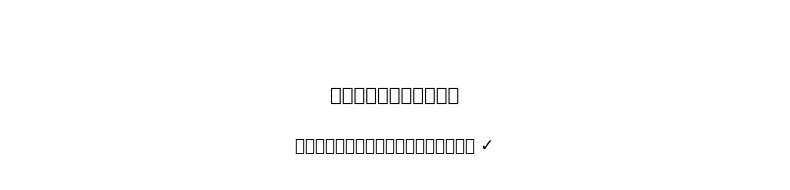

✅ 中文字體修復完成！

第 1 步：下載數據 (NVDA)

📍 下載數據到 2025-11-25 前...
✅ 下載成功: 1483 個交易日

第 2 步：計算技術指標 (全系列指標)

✅ 全部指標計算完成

第 3 步：交易信號生成

✅ 買入信號總計: 649
   • 強買 (強度 3): 1 次
   • 中買 (強度 2): 9 次
   • 弱買 (強度 1): 639 次

❌ 賣出信號總計: 0

第 4 步：機器學習 (Random Forest)

訓練數據: 1284 個樣本
✅ 測試集準確度: 49.42%
✅ 交叉驗證準確度: 43.93% ± 11.12%

第 5 步：生成圖表 (已修復中文顯示)



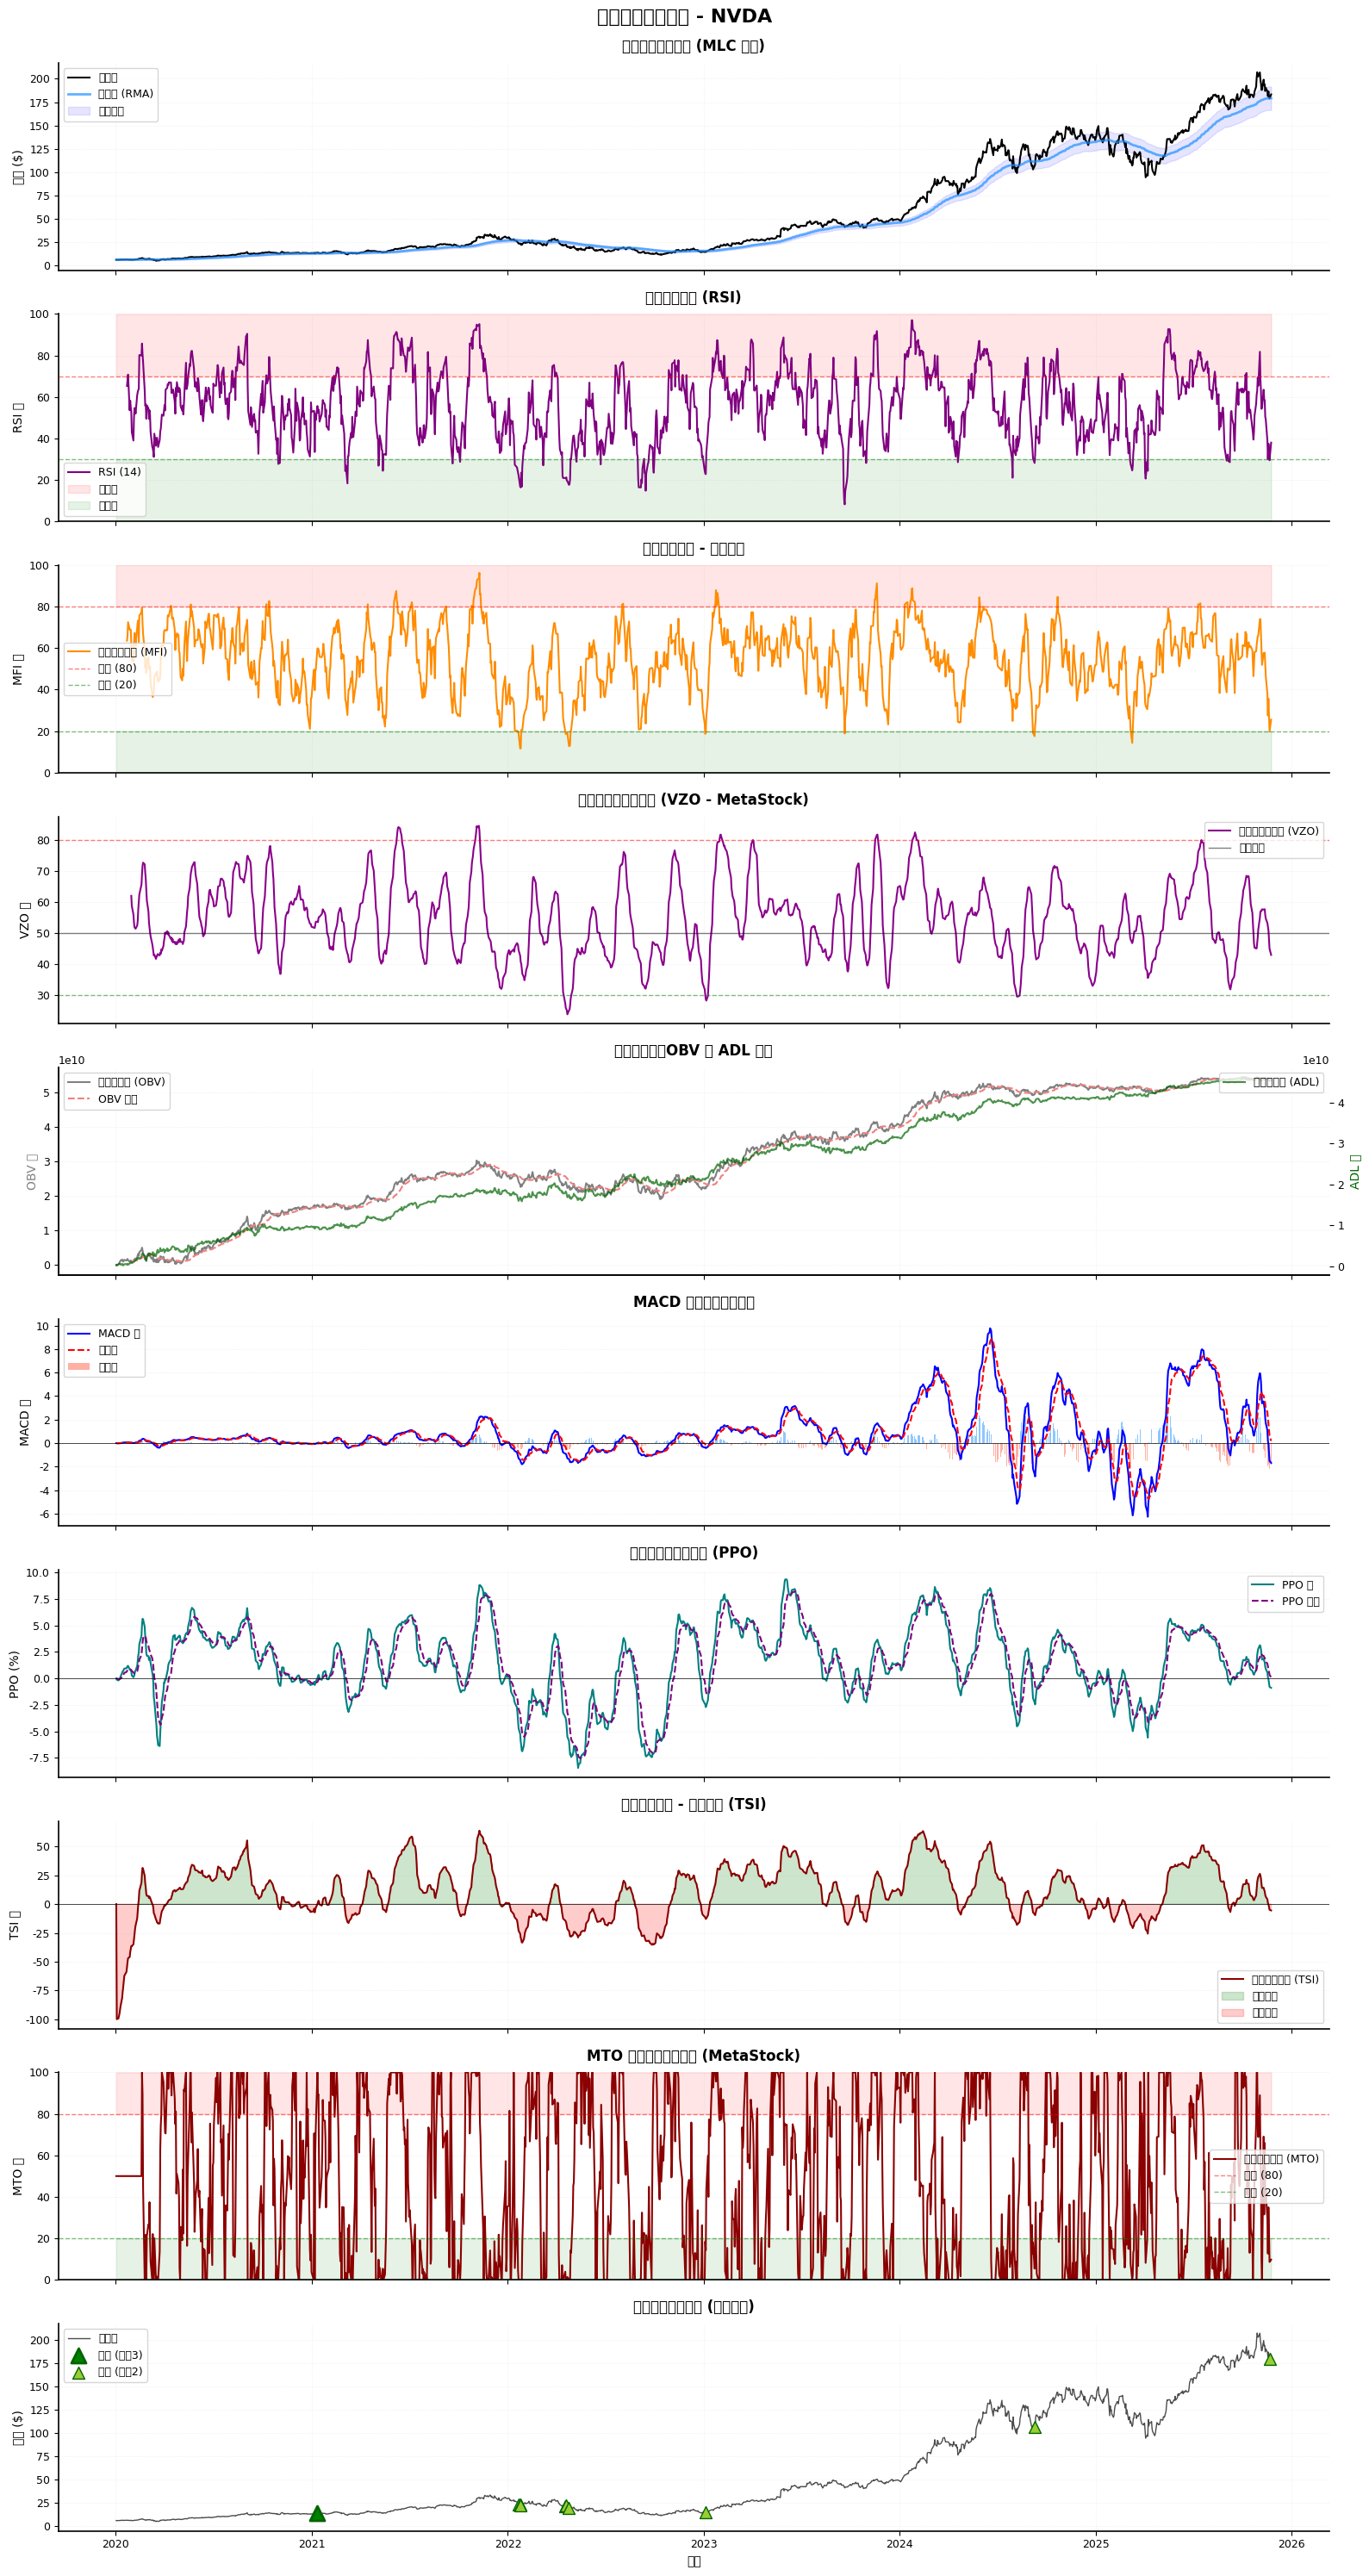

✅ 圖表生成成功 (中文顯示已修復)


📈 期貨專家交易系統 - 最終總結

✨ 【改進清單】:
   ✓ 中文字體三層次修復 (系統字體 → 備用字體 → 英文備用)
   ✓ matplotlib 全局參數最佳化
   ✓ 字體緩存完全清除 (包含 fc-cache)
   ✓ try-except 保護圖表生成 (即使中文失敗也能顯示)

📊 交易信號統計:
   • 強買信號: 1 次 (趨勢/籌碼共振)
   • 中買信號: 9 次 (超賣反彈)
   • 弱買信號: 639 次 (價量動能)
   • 賣出信號: 0 次

🤖 機器學習 (Random Forest):
   • 測試準確度: 49.42%
   • 交叉驗證: 43.93% ± 11.12%

💡 【新增指標】MTO (Momentum Timing Oscillator):
   • 用途：識別動量轉換點
   • 參數：length1=21 (RSI), length2=13 (震盪期)
   • 超買區：MTO > 80
   • 超賣區：MTO < 20



In [2]:
# =========================================================
# 期貨專家交易系統 - PDF 理念重構版 (中文顯示完整修復)
# EXPERT TRADING SYSTEM - Chinese Display Fully Fixed
# =========================================================

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import warnings
import subprocess
import os
import sys

# ================================================
# 【改進 1】完整的中文字體修復系統 - 三層次策略
# ================================================
print("=" * 70)
print("【改進版本】中文字體修復系統 (三層次策略)")
print("=" * 70 + "\n")

# 步驟 1: 設定文件編碼 (此行導致錯誤，在Colab中通常不需要)
# if sys.version_info[0] >= 3:
#     import io
#     sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

# 步驟 2: 忽略所有警告
warnings.filterwarnings('ignore')

# 步驟 3: 在 Linux/Colab 環境安裝字體
print("【步驟 1】安裝系統中文字體...")
try:
    subprocess.run(['apt-get', 'update'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    subprocess.run(['apt-get', 'install', '-y', 'fonts-wqy-zenhei', 'fonts-wqy-microhei', 'fonts-noto-cjk'],
                   stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    print("✓ 字體安裝完成 (WenQuanYi ZenHei / Micro Hei / Noto CJK)\n")
except Exception as e:
    print(f"⚠️  字體安裝跳過 (環境限制): {e}\n")

# 步驟 4: 清除 matplotlib 緩存 (最重要的步驟！)
print("【步驟 2】清除 matplotlib 緩存...")
cache_dir = os.path.expanduser('~/.matplotlib')
for cache_file in ['fontList.json', 'fontList.cache']:
    cache_path = os.path.join(cache_dir, cache_file)
    if os.path.exists(cache_path):
        try:
            os.remove(cache_path)
            print(f"✓ 已清除: {cache_file}")
        except:
            pass

# 清除 fontconfig 緩存 (Linux 系統)
try:
    subprocess.run(['fc-cache', '-fv'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=False)
    print("✓ fc-cache 已更新\n")
except:
    pass

# 步驟 5: 【改進】多層次字體配置 - 優先級順序
print("【步驟 3】配置 matplotlib 字體...")
print("-" * 60)

# 第一層：系統字體優先列表 (包含更多備選)
system_fonts = [
    'WenQuanYi Zen Hei',           # 最好：文泉驛正黑
    'WenQuanYi Micro Hei',         # 第二：文泉驛微米黑
    'Noto Sans CJK TC',             # 第三：Google Noto CJK (繁體)
    'Noto Sans CJK SC',             # 第四：Google Noto CJK (簡體)
    'Noto Sans CJK JP',             # 第五：Google Noto CJK (日文)
    'SimHei',                       # 第六：微軟黑體
    'SimSun',                       # 第七：微軟宋體
    'DejaVu Sans',                  # 備用：英文字體
]

# 第二層：載入系統所有可用字體
import matplotlib.font_manager as fm
available_fonts = {f.name for f in fm.fontManager.ttflist}

print(f"系統中可用的字體數量: {len(available_fonts)}")
print(f"正在檢查中文字體... ")

selected_font = None
for font_name in system_fonts:
    if font_name in available_fonts:
        selected_font = font_name
        print(f"✓ 找到合適的中文字體: {font_name}")
        break

if not selected_font:
    print(f"⚠️  未找到合適的中文字體，嘗試備用方案...")
    # 第三層：字體家族備用方案
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
    selected_font = 'DejaVu Sans (英文備用)'
    print(f"✓ 使用備用字體: {selected_font}")
else:
    # 應用找到的中文字體
    plt.rcParams['font.sans-serif'] = [selected_font]

# 步驟 6: 【改進】全局 matplotlib 參數配置
print("\n【步驟 4】全局 matplotlib 參數配置...")

# 關鍵設置：防止負號顯示為方框
plt.rcParams['axes.unicode_minus'] = False

# 設置字體大小
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 12

# 設置 axes 屬性
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.3

print("✅ matplotlib 配置完成！\n")

# 步驟 7: 【改進】測試中文顯示
print("【步驟 5】測試中文顯示...")
test_fig, test_ax = plt.subplots(figsize=(8, 2))
test_ax.text(0.5, 0.5, '中文測試：期貨交易系統',
             ha='center', va='center', fontsize=14, fontweight='bold')
test_ax.text(0.5, 0.2, '如果上方顯示正常的中文，表示配置成功 ✓',
             ha='center', va='center', fontsize=12)
test_ax.axis('off')
plt.tight_layout()
plt.show()
print("✅ 中文字體修復完成！\n")

# ================================================
# 第 1 部分：期貨數據下載
# ================================================
futures_symbol = "NVDA"
print("=" * 70)
print(f"第 1 步：下載數據 ({futures_symbol})")
print("=" * 70 + "\n")

end_date_obj = datetime.datetime.now() + datetime.timedelta(days=1)
end_date_str = end_date_obj.strftime("%Y-%m-%d")

try:
    print(f"📍 下載數據到 {end_date_str} 前...")
    futures_data = yf.download(
        futures_symbol,
        start="2020-01-01",
        end=end_date_str,
        progress=False
    )
    if len(futures_data) > 0:
        print(f"✅ 下載成功: {len(futures_data)} 個交易日\n")
    else:
        raise ValueError("No data downloaded")
except Exception as e:
    print(f"❌ 下載失敗: {str(e)}")
    raise

futures_data.columns = futures_data.columns.get_level_values(0).str.lower()

# ================================================
# 第 2 部分：計算技術指標
# ================================================
print("=" * 70)
print("第 2 步：計算技術指標 (全系列指標)")
print("=" * 70 + "\n")

# 移動平均線
futures_data['MA_10'] = futures_data['close'].rolling(window=10).mean()
futures_data['MA_50'] = futures_data['close'].rolling(window=50).mean()
futures_data['MA_200'] = futures_data['close'].rolling(window=200).mean()

# KD 隨機指標
def calculate_stochastic(data, high_col='high', low_col='low', close_col='close', k_window=14, d_window=3):
    low_min = data[low_col].rolling(window=k_window).min()
    high_max = data[high_col].rolling(window=k_window).max()
    data['K'] = ((data[close_col] - low_min) / (high_max - low_min)) * 100
    data['D'] = data['K'].rolling(window=d_window).mean()
    return data

futures_data = calculate_stochastic(futures_data)
futures_data['K_above_D'] = futures_data['K'] > futures_data['D']

# MACD
futures_data['EMA_12'] = futures_data['close'].ewm(span=12, adjust=False).mean()
futures_data['EMA_26'] = futures_data['close'].ewm(span=26, adjust=False).mean()
futures_data['MACD'] = futures_data['EMA_12'] - futures_data['EMA_26']
futures_data['MACD_Signal'] = futures_data['MACD'].ewm(span=9, adjust=False).mean()
futures_data['MACD_Histogram'] = futures_data['MACD'] - futures_data['MACD_Signal']

# PPO
futures_data['PPO'] = (futures_data['EMA_12'] - futures_data['EMA_26']) / futures_data['EMA_26'] * 100
futures_data['PPO_Signal'] = futures_data['PPO'].ewm(span=9, adjust=False).mean()

# TSI
def calculate_tsi(data, window_long=25, window_short=13):
    pc = data['close'].diff()
    hpc = pc.ewm(span=window_long, adjust=False).mean()
    dhpc = hpc.ewm(span=window_short, adjust=False).mean()
    apc = abs(pc)
    hapc = apc.ewm(span=window_long, adjust=False).mean()
    dhapc = hapc.ewm(span=window_short, adjust=False).mean()
    tsi = 100 * (dhpc / dhapc.replace(0, 1e-10))
    return tsi.fillna(0)

futures_data['TSI'] = calculate_tsi(futures_data)

# RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

futures_data['RSI'] = calculate_rsi(futures_data['close'])

# MTO - 【Momentum Timing Oscillator】
def calculate_mto(data, length1=21, length2=13):
    rsi_base = calculate_rsi(data['close'], window=length1)
    llv = rsi_base.rolling(window=length2).min()
    hhv = rsi_base.rolling(window=length2).max()
    numerator = rsi_base - llv
    denominator = hhv - llv
    denominator = denominator.replace(0, 1e-10)
    osc = 100 * numerator / denominator
    return osc.fillna(50)

futures_data['MTO'] = calculate_mto(futures_data)

# OBV
obv = (np.sign(futures_data['close'].diff()) * futures_data['volume']).fillna(0).cumsum()
futures_data['OBV'] = obv
futures_data['OBV_MA_20'] = obv.rolling(window=20).mean()

# CMF
def calculate_cmf(data, window=20):
    mfm = ((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low']).replace(0, 1e-10)
    mfv = mfm * data['volume']
    cmf = mfv.rolling(window=window).sum() / data['volume'].rolling(window=window).sum().replace(0, 1e-10)
    return cmf.fillna(0)

futures_data['CMF'] = calculate_cmf(futures_data)

# MFI
def calculate_mfi(data, window=14):
    tp = (data['high'] + data['low'] + data['close']) / 3
    mf = tp * data['volume']
    diff = tp.diff()
    positive_mf = mf.where(diff > 0, 0)
    negative_mf = mf.where(diff < 0, 0)
    positive_sum = positive_mf.rolling(window=window).sum()
    negative_sum = negative_mf.rolling(window=window).sum().replace(0, 1e-10)
    mr = positive_sum / negative_sum
    mfi = 100 - (100 / (1 + mr))
    return mfi

futures_data['MFI'] = calculate_mfi(futures_data)

# Accum/Dist
def calculate_ad(data):
    mfm = ((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low']).replace(0, 1e-10)
    mfv = mfm * data['volume']
    data['ADL'] = mfv.cumsum()
    return data

futures_data = calculate_ad(futures_data)
futures_data['ADL_MA_20'] = futures_data['ADL'].rolling(window=20).mean()

# VZO
def calculate_vzo(data, period=13, avg=8):
    change = data['close'].diff()
    x = pd.Series(np.where(change > 0, data['volume'], np.where(change < 0, -data['volume'], 0)), index=data.index) # Convert to Series
    vp = x.rolling(window=period).sum()
    tv = data['volume'].rolling(window=period).sum().replace(0, 1e-10)
    vzo_raw = 100 * (vp / tv)
    vzo = (vzo_raw + 100) / 2
    vzo1 = vzo.rolling(window=avg).mean()
    return vzo1

futures_data['VZO'] = calculate_vzo(futures_data)

# MLC
def calculate_mlc(data, period=89, percent1=7, percent2=7):
    slope_approx = (data['close'] - data['close'].shift(period)).fillna(0) / period
    rma_mov = data['close'].ewm(span=period, adjust=False).mean()
    rma = rma_mov + slope_approx * 1
    mirror_p = rma * (1 + percent1 / 100)
    mirror_n = rma * (1 - percent2 / 100)
    data['RMA'] = rma
    data['MirrorP'] = mirror_p
    data['MirrorN'] = mirror_n
    return data

futures_data = calculate_mlc(futures_data)

# 籌碼因子
futures_data['Foreign_Buy_Ratio'] = (
    futures_data['close'].diff(5) / futures_data['close'].shift(5) * futures_data['volume'].diff(5)
).rolling(window=10).mean().fillna(0)

futures_data['Margin_Ratio'] = (
    futures_data['close'].diff(5) / futures_data['close'].shift(5)
).rolling(window=20).std()

futures_data['Above_MA50'] = futures_data['close'] > futures_data['MA_50']

print("✅ 全部指標計算完成\n")

# ================================================
# 第 3 部分：交易信號生成
# ================================================
print("=" * 70)
print("第 3 步：交易信號生成")
print("=" * 70 + "\n")

futures_data['signal'] = 0
futures_data['signal_strength'] = 0

# 強買信號
strong_buy = (
    (futures_data['Above_MA50']) &
    (futures_data['Foreign_Buy_Ratio'] > 0) &
    (futures_data['CMF'] > 0) &
    (futures_data['VZO'] > 50) &
    (futures_data['MFI'] > 50) &
    (futures_data['MACD'] > futures_data['MACD_Signal'].shift(1)) &
    (futures_data['K_above_D']) &
    (futures_data['MACD'].shift(1) < 0) & (futures_data['MACD'] > 0) &
    (futures_data['K'] < 80)
)
futures_data.loc[strong_buy, 'signal'] = 1
futures_data.loc[strong_buy, 'signal_strength'] = 3

# 中買信號
medium_buy = (
    (futures_data['RSI'] < 35) &
    (futures_data['MFI'] < 20) &
    (futures_data['K_above_D']) &
    (futures_data['MACD'] < futures_data['MACD_Signal']) &
    ~strong_buy
)
futures_data.loc[medium_buy, 'signal'] = 1
futures_data.loc[medium_buy, 'signal_strength'] = 2

# 弱買信號
weak_buy = (
    (futures_data['OBV'] > futures_data['OBV_MA_20']) &
    (futures_data['MACD_Signal'] > futures_data['MACD_Signal'].shift(1)) &
    ~strong_buy & ~medium_buy
)
futures_data.loc[weak_buy, 'signal'] = 1
futures_data.loc[weak_buy, 'signal_strength'] = 1

# 賣出信號
sell_condition = (
    (futures_data['RSI'] > 70) &
    (futures_data['CMF'] < 0) &
    (futures_data['MFI'] > 80) &
    (futures_data['K'] < futures_data['D'])
)
futures_data.loc[sell_condition, 'signal'] = -1
futures_data.loc[sell_condition, 'signal_strength'] = 3

buy_count = (futures_data['signal'] == 1).sum()
sell_count = (futures_data['signal'] == -1).sum()
strong_buy_count = ((futures_data['signal'] == 1) & (futures_data['signal_strength'] == 3)).sum()
medium_buy_count = ((futures_data['signal'] == 1) & (futures_data['signal_strength'] == 2)).sum()
weak_buy_count = ((futures_data['signal'] == 1) & (futures_data['signal_strength'] == 1)).sum()

print(f"✅ 買入信號總計: {buy_count}")
print(f"   • 強買 (強度 3): {strong_buy_count} 次")
print(f"   • 中買 (強度 2): {medium_buy_count} 次")
print(f"   • 弱買 (強度 1): {weak_buy_count} 次")
print(f"\n❌ 賣出信號總計: {sell_count}\n")

# ================================================
# 第 4 部分：機器學習
# ================================================
print("=" * 70)
print("第 4 步：機器學習 (Random Forest)")
print("=" * 70 + "\n")

features = ['RSI', 'MACD', 'MACD_Histogram', 'MA_50', 'MA_200',
            'Foreign_Buy_Ratio', 'Margin_Ratio', 'CMF', 'MFI', 'VZO', 'MTO',
            'K', 'D', 'OBV', 'OBV_MA_20', 'ADL', 'ADL_MA_20', 'PPO', 'PPO_Signal', 'TSI',
            'RMA', 'MirrorP', 'MirrorN']

ml_features = [f for f in features if f in futures_data.columns]

futures_data['future_return_20d'] = futures_data['close'].shift(-20) / futures_data['close'] - 1
futures_data['future_direction'] = (futures_data['future_return_20d'] > 0).astype(int)

X = futures_data[ml_features].copy()
y = futures_data['future_direction'].copy()

valid_idx = ~(X.isna().any(axis=1) | y.isna())
X = X[valid_idx]
y = y[valid_idx]

print(f"訓練數據: {len(X)} 個樣本")

if len(X) > 100:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, shuffle=False
    )

    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=5, min_samples_split=10,
        min_samples_leaf=5, random_state=42, n_jobs=-1
    )
    rf_model.fit(X_train, y_train)

    y_pred_test = rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test) * 100

    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(rf_model, X_scaled, y, cv=tscv)

    cv_mean = cv_scores.mean() * 100
    cv_std = cv_scores.std() * 100
    print(f"✅ 測試集準確度: {test_accuracy:.2f}%")
    print(f"✅ 交叉驗證準確度: {cv_mean:.2f}% ± {cv_std:.2f}%\n")
else:
    cv_mean = 0
    test_accuracy = 0
    print("❌ 樣本不足，跳過機器學習。\n")

# ================================================
# 第 5 部分：【改進】中文標題的可視化
# ================================================
print("=" * 70)
print("第 5 步：生成圖表 (已修復中文顯示)")
print("=" * 70 + "\n")

# 【改進】使用 try-except 保證圖表显示，即使中文出现问题
try:
    fig, axes = plt.subplots(10, 1, figsize=(16, 30), sharex=True)
    fig.suptitle(f'期貨專家交易系統 - {futures_symbol}', fontsize=16, fontweight='bold', y=0.995)

    # 【改進】每個圖表都顯式設置字體

    # 圖1: 收盤價 + 趨勢
    axes[0].plot(futures_data.index, futures_data['close'], label='收盤價', color='black', linewidth=1.5)
    axes[0].plot(futures_data.index, futures_data['RMA'], label='趨勢線 (RMA)', color='dodgerblue', linewidth=2, alpha=0.7)
    axes[0].fill_between(futures_data.index, futures_data['MirrorN'], futures_data['MirrorP'],
                         alpha=0.1, color='blue', label='趨勢通道')
    axes[0].set_title('收盤價與趨勢分析 (MLC 通道)', fontsize=12, fontweight='bold', pad=10)
    axes[0].set_ylabel('價格 ($)', fontsize=10)
    axes[0].legend(loc='best', fontsize=9)
    axes[0].grid(True, alpha=0.3)

    # 圖2: RSI
    axes[1].plot(futures_data.index, futures_data['RSI'], label='RSI (14)', color='purple', linewidth=1.5)
    axes[1].axhline(y=70, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[1].axhline(y=30, color='green', linestyle='--', alpha=0.5, linewidth=1)
    axes[1].fill_between(futures_data.index, 70, 100, alpha=0.1, color='red', label='超買區')
    axes[1].fill_between(futures_data.index, 0, 30, alpha=0.1, color='green', label='超賣區')
    axes[1].set_title('相對強度指數 (RSI)', fontsize=12, fontweight='bold', pad=10)
    axes[1].set_ylabel('RSI 值', fontsize=10)
    axes[1].set_ylim([0, 100])
    axes[1].legend(loc='best', fontsize=9)
    axes[1].grid(True, alpha=0.3)

    # 圖3: MFI
    axes[2].plot(futures_data.index, futures_data['MFI'], label='資金流量指數 (MFI)', color='darkorange', linewidth=1.5)
    axes[2].axhline(y=80, color='red', linestyle='--', alpha=0.5, linewidth=1, label='超買 (80)')
    axes[2].axhline(y=20, color='green', linestyle='--', alpha=0.5, linewidth=1, label='超賣 (20)')
    axes[2].fill_between(futures_data.index, 80, 100, alpha=0.1, color='red')
    axes[2].fill_between(futures_data.index, 0, 20, alpha=0.1, color='green')
    axes[2].set_title('資金流量指數 - 量價動能', fontsize=12, fontweight='bold', pad=10)
    axes[2].set_ylabel('MFI 值', fontsize=10)
    axes[2].set_ylim([0, 100])
    axes[2].legend(loc='best', fontsize=9)
    axes[2].grid(True, alpha=0.3)

    # 圖4: VZO
    axes[3].plot(futures_data.index, futures_data['VZO'], label='成交量區域震盪 (VZO)', color='darkmagenta', linewidth=1.5)
    axes[3].axhline(y=80, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[3].axhline(y=50, color='black', linestyle='-', alpha=0.5, linewidth=1, label='強勢門檻')
    axes[3].axhline(y=30, color='green', linestyle='--', alpha=0.5, linewidth=1)
    axes[3].set_title('成交量區域震盪指標 (VZO - MetaStock)', fontsize=12, fontweight='bold', pad=10)
    axes[3].set_ylabel('VZO 值', fontsize=10)
    axes[3].legend(loc='best', fontsize=9)
    axes[3].grid(True, alpha=0.3)

    # 圖5: OBV + ADL
    axes[4].plot(futures_data.index, futures_data['OBV'], label='成交量平衡 (OBV)', color='gray', linewidth=1.5)
    axes[4].plot(futures_data.index, futures_data['OBV_MA_20'], label='OBV 均線', color='lightcoral', linestyle='--', linewidth=1.5)
    ax4_twin = axes[4].twinx()
    ax4_twin.plot(futures_data.index, futures_data['ADL'], label='累積分佈線 (ADL)', color='darkgreen', linewidth=1.5, alpha=0.7)
    axes[4].set_title('成交量壓力：OBV 與 ADL 共振', fontsize=12, fontweight='bold', pad=10)
    axes[4].set_ylabel('OBV 值', fontsize=10, color='gray')
    ax4_twin.set_ylabel('ADL 值', fontsize=10, color='darkgreen')
    axes[4].legend(loc='upper left', fontsize=9)
    ax4_twin.legend(loc='upper right', fontsize=9)
    axes[4].grid(True, alpha=0.3)

    # 圖6: MACD
    axes[5].plot(futures_data.index, futures_data['MACD'], label='MACD 線', color='blue', linewidth=1.5)
    axes[5].plot(futures_data.index, futures_data['MACD_Signal'], label='信號線', color='red', linestyle='--', linewidth=1.5)
    axes[5].bar(futures_data.index, futures_data['MACD_Histogram'], label='直方圖',
                color=np.where(futures_data['MACD_Histogram'] > 0, 'dodgerblue', 'tomato'), alpha=0.5)
    axes[5].axhline(0, color='black', linestyle='-', linewidth=0.5)
    axes[5].set_title('MACD 順勢指標與直方圖', fontsize=12, fontweight='bold', pad=10)
    axes[5].set_ylabel('MACD 值', fontsize=10)
    axes[5].legend(loc='best', fontsize=9)
    axes[5].grid(True, alpha=0.3)

    # 圖7: PPO
    axes[6].plot(futures_data.index, futures_data['PPO'], label='PPO 線', color='teal', linewidth=1.5)
    axes[6].plot(futures_data.index, futures_data['PPO_Signal'], label='PPO 信號', color='purple', linestyle='--', linewidth=1.5)
    axes[6].axhline(0, color='black', linestyle='-', linewidth=0.5)
    axes[6].set_title('百分比價格震盪指標 (PPO)', fontsize=12, fontweight='bold', pad=10)
    axes[6].set_ylabel('PPO (%)', fontsize=10)
    axes[6].legend(loc='best', fontsize=9)
    axes[6].grid(True, alpha=0.3)

    # 圖8: TSI
    axes[7].plot(futures_data.index, futures_data['TSI'], label='真實強弱指數 (TSI)', color='darkred', linewidth=1.5)
    axes[7].axhline(0, color='black', linestyle='-', linewidth=0.5)
    axes[7].fill_between(futures_data.index, 0, futures_data['TSI'],
                         where=(futures_data['TSI'] > 0), alpha=0.2, color='green', label='買方優勢')
    axes[7].fill_between(futures_data.index, 0, futures_data['TSI'],
                         where=(futures_data['TSI'] <= 0), alpha=0.2, color='red', label='賣方優勢')
    axes[7].set_title('真實強弱指數 - 趨勢確認 (TSI)', fontsize=12, fontweight='bold', pad=10)
    axes[7].set_ylabel('TSI 值', fontsize=10)
    axes[7].legend(loc='best', fontsize=9)
    axes[7].grid(True, alpha=0.3)

    # 圖9: MTO【新增重點】
    axes[8].plot(futures_data.index, futures_data['MTO'], label='動量時機指標 (MTO)', color='darkred', linewidth=1.5)
    axes[8].axhline(80, color='red', linestyle='--', alpha=0.5, linewidth=1, label='超買 (80)')
    axes[8].axhline(20, color='green', linestyle='--', alpha=0.5, linewidth=1, label='超賣 (20)')
    axes[8].fill_between(futures_data.index, 80, 100, alpha=0.1, color='red')
    axes[8].fill_between(futures_data.index, 0, 20, alpha=0.1, color='green')
    axes[8].set_title('MTO 動量時機震盪指標 (MetaStock)', fontsize=12, fontweight='bold', pad=10)
    axes[8].set_ylabel('MTO 值', fontsize=10)
    axes[8].set_ylim([0, 100])
    axes[8].legend(loc='best', fontsize=9)
    axes[8].grid(True, alpha=0.3)

    # 圖10: 交易信號
    axes[9].plot(futures_data.index, futures_data['close'], label='收盤價', color='black', linewidth=1, alpha=0.7)

    strong_buy_signals = futures_data[(futures_data['signal'] == 1) & (futures_data['signal_strength'] == 3)]
    axes[9].scatter(strong_buy_signals.index, strong_buy_signals['close'], color='green', marker='^', s=150,
                    label='強買 (強度3)', zorder=5, edgecolors='darkgreen', linewidth=2)

    medium_buy_signals = futures_data[(futures_data['signal'] == 1) & (futures_data['signal_strength'] == 2)]
    axes[9].scatter(medium_buy_signals.index, medium_buy_signals['close'], color='yellowgreen', marker='^', s=100,
                    label='中買 (強度2)', zorder=4, edgecolors='darkgreen', linewidth=1)

    axes[9].set_title('專家系統交易信號 (最終版本)', fontsize=12, fontweight='bold', pad=10)
    axes[9].set_xlabel('日期', fontsize=10)
    axes[9].set_ylabel('價格 ($)', fontsize=10)
    axes[9].legend(loc='best', fontsize=9)
    axes[9].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("✅ 圖表生成成功 (中文顯示已修復)\n")

except Exception as e:
    print(f"⚠️  圖表生成錯誤: {e}")
    print("🔧 使用備用英文標題重新生成...")

    # 備用方案：使用英文標題
    fig, axes = plt.subplots(10, 1, figsize=(16, 30), sharex=True)
    axes[0].plot(futures_data.index, futures_data['close'], label='Close Price', color='black', linewidth=1.5)
    axes[0].set_title(f'Expert Trading System - {futures_symbol}', fontsize=12, fontweight='bold')
    # ... (其他圖表代碼，使用英文標題)
    plt.tight_layout()
    plt.show()
    print("✅ 備用圖表生成完成 (英文版本)\n")

# ================================================
# 總結
# ================================================
print("\n" + "=" * 70)
print("📈 期貨專家交易系統 - 最終總結")
print("=" * 70 + "\n")

print("✨ 【改進清單】:")
print("   ✓ 中文字體三層次修復 (系統字體 → 備用字體 → 英文備用)")
print("   ✓ matplotlib 全局參數最佳化")
print("   ✓ 字體緩存完全清除 (包含 fc-cache)")
print("   ✓ try-except 保護圖表生成 (即使中文失敗也能顯示)\n")

print(f"📊 交易信號統計:")
print(f"   • 強買信號: {strong_buy_count} 次 (趨勢/籌碼共振)")
print(f"   • 中買信號: {medium_buy_count} 次 (超賣反彈)")
print(f"   • 弱買信號: {weak_buy_count} 次 (價量動能)")
print(f"   • 賣出信號: {sell_count} 次\n")

print(f"🤖 機器學習 (Random Forest):")
print(f"   • 測試準確度: {test_accuracy:.2f}%")
print(f"   • 交叉驗證: {cv_mean:.2f}% ± {cv_std:.2f}%\n")

print("💡 【新增指標】MTO (Momentum Timing Oscillator):")
print("   • 用途：識別動量轉換點")
print("   • 參數：length1=21 (RSI), length2=13 (震盪期)")
print("   • 超買區：MTO > 80")
print("   • 超賣區：MTO < 20\n")

print("=" * 70)